<a href="https://colab.research.google.com/github/Pavel-Zinkevich/Employee_salary/blob/main/Employee_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries and data import

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import ipywidgets as widgets
from IPython.display import display, clear_output

In [4]:
od.download("https://www.kaggle.com/datasets/gmudit/employer-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pavelzinkevich
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/gmudit/employer-data


100%|██████████| 163k/163k [00:00<00:00, 19.0MB/s]

In [5]:
df = pd.read_csv("employer-data/Employers_data.csv")

📊 Employee Salary Dataset
This synthetic dataset has been created for educational purposes and is ideal for exploring regression modeling. It includes realistic employee information with consistent relationships between features such as education level, job title, experience, and salary.

🧾 Dataset Summary
Property	Description
Rows	10,000
Target Variable	Salary (or another column as needed)
Use Case	Regression, EDA, feature engineering, model evaluation, fairness analysis

📌 Features

| Column            | Type        | Description                                                                 |
|-------------------|-------------|-----------------------------------------------------------------------------|
| `Employee_ID`     | Integer     | Unique identifier for each employee                                         |
| `Name`            | String      | Full name (gender-aware generation)                                         |
| `Gender`          | Categorical | Male or Female                                                              |
| `Age`             | Integer     | Age of the employee (based on education level and job title)                |
| `Education_Level` | Categorical | One of: High School, Bachelor, Master, PhD                                  |
| `Experience_Years`| Integer     | Number of years of professional experience                                  |
| `Department`      | Categorical | Business unit (e.g., HR, Engineering, Marketing, etc.)                      |
| `Job_Title`       | Categorical | Role of the employee (e.g., Analyst, Engineer, Manager, etc.)              |
| `Location`        | Categorical | Work location (e.g., New York, San Francisco, etc.)                         |
| `Salary`          | Integer     | Annual salary in USD — target variable for regression     

✅ Characteristics
- ✅ No missing values — all entries are complete  
- 📈 Realistic correlations, such as:
  - 🎓 Higher education → 💼 Higher job levels → 💰 Higher salaries  
  - 🧑‍🎓 Interns are younger and earn less  
  - 🧠 PhDs tend to be older and hold senior roles  
  - 🌍 Salary varies across departments and locations

🎯 Applications
- This dataset is well-suited for:

- 🔢 Regression modeling (Linear, XGBoost, Random Forest, etc.)

- 🛠️ Feature engineering and selection

- 🧠 Categorical variable encoding (one-hot, label encoding, etc.)

- 🔍 Hyperparameter tuning

- ⚖️ Bias & fairness analysis (e.g., gender pay gap)

- 📊 Exploratory Data Analysis (EDA) and visualization



In [6]:
df.head()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000


In [7]:
df.Location.value_counts()

,count
Location,
Austin,2034
Seattle,2017
Chicago,2008
New York,1980
San Francisco,1961


#Data manipulation and data visualisation

In [8]:
age_counts = df['Age'].value_counts().sort_index()


fig = px.bar(
    x=age_counts.index,
    y=age_counts.values,
    labels={'x': 'Age', 'y': 'Count'},
    title='Age Distribution',
    color_discrete_sequence=['#00CC96']
)


fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count',
    plot_bgcolor='white',
    title_font=dict(size=20),
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey')
)

fig.show()

In [9]:
fig = px.histogram(df, x='Salary', nbins=20, title='Salary Distribution',
                   labels={'Salary': 'Salary'},

                   color_discrete_sequence=['#636EFA'])


fig.update_layout(
    bargap=0.1,
    plot_bgcolor='white',
    title_font=dict(size=20),
    xaxis=dict(title='Salary', showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(title='Count', showgrid=True, gridcolor='lightgrey'),
)

fig.show()

In [10]:
education_counts = df.groupby(['Department', 'Education_Level']).size().reset_index(name='Count')

fig = px.bar(
    education_counts,
    x='Department',
    y='Count',
    color='Education_Level',
    title='Education Level by Department',
    labels={'Count': 'Count', 'Department': 'Department', 'Education_Level': 'Education Level'},
    color_discrete_sequence=px.colors.qualitative.Pastel,
)


fig.update_layout(
    barmode='stack',
    xaxis_title='Department',
    yaxis_title='Count',
    plot_bgcolor='white',
    title_font=dict(size=20),
    xaxis=dict(tickangle=45, showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    legend_title_text='Education Level'
)

fig.show()

In [11]:
job_counts = df['Job_Title'].value_counts().reset_index()
job_counts.columns = ['Job_Title', 'Count']

fig = px.bar(
    job_counts,
    x='Job_Title',
    y='Count',
    title='Number of Employees per Job Title',
    color='Job_Title',
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig.update_layout(
    xaxis_title='Job Title',
    yaxis_title='Count',
    plot_bgcolor='white',
    title_font=dict(size=20),
    xaxis=dict(tickangle=45, showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    showlegend=False
)

fig.show()

In [12]:
df["Gender_encoded"]=(df['Gender']=="Male").astype(int)

In [13]:
df_dummies = pd.get_dummies(df.drop(columns = ["Name", "Employee_ID", "Gender"]), drop_first=True)

In [14]:
df_dummies.head()

,Age,Experience_Years,Salary,Gender_encoded,Department_Finance,Department_HR,Department_Marketing,Department_Product,Department_Sales,Job_Title_Engineer,Job_Title_Executive,Job_Title_Intern,Job_Title_Manager,Education_Level_Master,Education_Level_PhD,Location_Chicago,Location_New York,Location_San Francisco,Location_Seattle
0,24,1,90000,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
1,56,33,195000,1,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True
2,21,1,35000,1,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
3,30,9,75000,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,25,2,70000,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True


#Model construction

In [15]:
def model_fit(df, model):
    x = df.drop(columns=['Salary'])  # Features
    y = df['Salary']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('MSE:', mse)
    print('R2:', r2)
    residuals = y_test - y_pred
    plt.figure(figsize=(7, 4))
    sns.histplot(residuals, bins=40, kde=True)
    plt.axvline(0, color='red', linestyle='--')
    plt.title('Distribution of Residuals')
    plt.xlabel('Error (Actual - Predicted)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    return y_pred, mse, r2, model

#Fit and prediction

In [16]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.05, 0.1],
# }

# grid = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror'), param_grid, scoring='neg_mean_absolute_error')
# grid.fit(X_train, y_train)

# print("Best params:", grid.best_params_)
# best_params = grid.best_params_

# Best params: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 1}

MSE: 17974718.0
R2: 0.9914717078208923


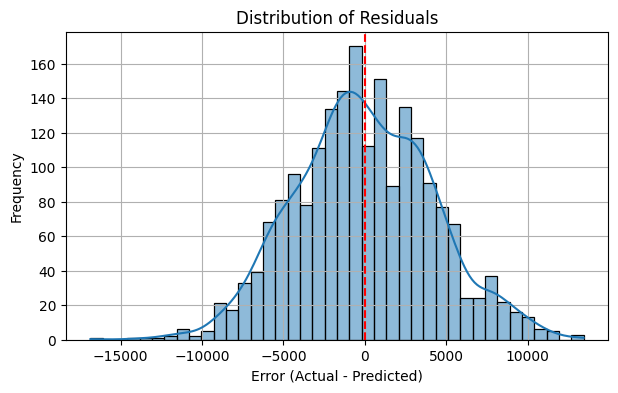

CPU times: user 920 ms, sys: 119 ms, total: 1.04 s
Wall time: 782 ms


(array([138305.92 ,  76653.875,  67507.81 , ...,  95446.29 , 189544.19 ,
         63747.38 ], dtype=float32),
 17974718.0,
 0.9914717078208923,
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.04, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=20, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...))

In [17]:
%%time
best_params = {
    'learning_rate': 0.04,
    'max_depth': 3,
    'min_child_weight': 20,
    'n_estimators': 500,
}
model_fit(df_dummies, xgb.XGBRegressor(objective='reg:squarederror', **best_params))

MSE: 17375021.621597122
R2: 0.9917562580370475


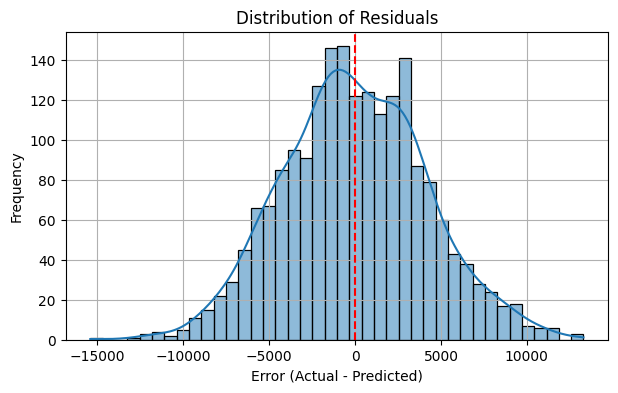

CPU times: user 395 ms, sys: 4.65 ms, total: 400 ms
Wall time: 258 ms


In [18]:
%%time
_, _,_,model_trained = model_fit(df_dummies, LinearRegression())

| Model           | MSE (Mean Squared Error) | R² (Coefficient of Determination) | Training Time (approx.) |
|-----------------|--------------------------|----------------------------------|------------------------|
| XGBRegressor    | 17,974,718               | 0.9915                           | ~0.8 sec               |
| LinearRegression| 17,375,021               | 0.9918                           | ~0.27 sec              |

Model Comparison Conclusion:

The Linear Regression model slightly outperformed the XGBoost model on this dataset, achieving a lower Mean Squared Error (MSE) and a marginally higher R² score. The XGBoost model was trained using optimized hyperparameters selected via a parameter grid search (param_grid), demonstrating strong performance as well.

Linear Regression trains faster and is simpler, making it a good choice for interpretability and quick results. XGBoost, being a more complex and flexible model, may offer better results on more complex datasets.

In summary, while Linear Regression performed better here, XGBoost remains a powerful alternative worth exploring depending on the problem complexity and computational resources.


#New Data Entery

In [ ]:
categorical_features = ['Gender', 'Department', 'Job_Title', 'Education_Level', 'Location']
numeric_features = ['Age', 'Experience_Years']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


X = df.drop(columns=['Salary', 'Name', 'Employee_ID'])
y = df['Salary']
model.fit(X, y)


new_example = pd.DataFrame({
    'Age': [24],
    'Gender': ['Female'],
    'Department': ['Product'],
    'Job_Title': ['Executive'],
    'Experience_Years': [2],
    'Education_Level': ['Bachelor'],
    'Location': ['Austin']
})

predicted_salary = model.predict(new_example)
print("Estimated Salary : $", predicted_salary[0])


In [ ]:
age_slider = widgets.IntSlider(min=18, max=65, step=1, value=24, description='Age:')
gender_dropdown = widgets.Dropdown(options=['Male', 'Female'], description='Gender:')
department_dropdown = widgets.Dropdown(options=df['Department'].unique(), description='Department:')
job_title_dropdown = widgets.Dropdown(options=df['Job_Title'].unique(), description='Job Title:')
experience_slider = widgets.IntSlider(min=0, max=40, step=1, value=1, description='Experience (years):')
education_dropdown = widgets.Dropdown(options=df['Education_Level'].unique(), description='Education:')
location_dropdown = widgets.Dropdown(options=df['Location'].unique(), description='Location:')

output = widgets.Output()

def predict_salary(change=None):
    with output:
        clear_output()

        input_data = pd.DataFrame({
            'Age': [age_slider.value],
            'Gender': [gender_dropdown.value],
            'Department': [department_dropdown.value],
            'Job_Title': [job_title_dropdown.value],
            'Experience_Years': [experience_slider.value],
            'Education_Level': [education_dropdown.value],
            'Location': [location_dropdown.value]
        })

        predicted_salary = model.predict(input_data)

        print(f"Estimated Salary : ${predicted_salary[0]:,.2f}")

age_slider.observe(predict_salary, names='value')
gender_dropdown.observe(predict_salary, names='value')
department_dropdown.observe(predict_salary, names='value')
job_title_dropdown.observe(predict_salary, names='value')
experience_slider.observe(predict_salary, names='value')
education_dropdown.observe(predict_salary, names='value')
location_dropdown.observe(predict_salary, names='value')

display(age_slider, gender_dropdown, department_dropdown, job_title_dropdown,
        experience_slider, education_dropdown, location_dropdown, output)

predict_salary()